# ANÁLISIS E INSIGHTS

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Automcompletar rápido
%config IPCompleter.greedy=True

#Formato de display
pd.options.display.float_format = '{:15.2f}'.format

sns.set_theme(style="whitegrid")

In [101]:
df = pd.read_pickle('../Datos/tablon_analitico.pickle')
df

,usuario,sesion,categoria,evento,producto,precio,date,año,mes,dia,hora,minuto,segundo,festivo,black_friday,san_valentin
fecha,,,,,,,,,,,,,,,,
2019-10-01 00:01:46,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,1487580005092295511,view,5843665,9.44,2019-10-01,2019,10,1,0,1,46,0,0,0
2019-10-01 00:01:55,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,1487580013069861041,cart,5868461,3.57,2019-10-01,2019,10,1,0,1,55,0,0,0
2019-10-01 00:02:50,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770,1487580006300255120,view,5877456,122.22,2019-10-01,2019,10,1,0,2,50,0,0,0
2019-10-01 00:03:41,555448072,b5f72ceb-0730-44de-a932-d16db62390df,1487580013749338323,view,5649270,6.19,2019-10-01,2019,10,1,0,3,41,0,0,0
2019-10-01 00:03:44,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5,1487580005411062629,view,18082,16.03,2019-10-01,2019,10,1,0,3,44,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:58:49,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815662,0.92,2020-02-29,2020,2,29,23,58,49,0,0,0
2020-02-29 23:58:57,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,view,5815665,0.59,2020-02-29,2020,2,29,23,58,57,0,0,0
2020-02-29 23:59:05,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815665,0.59,2020-02-29,2020,2,29,23,59,5,0,0,0


## Entendiendo los eventos

### ¿Cómo está funcionando el Customer Journey?

In [102]:
eventos = df.evento.value_counts()
eventos

view                961558
cart                574547
remove_from_cart    410357
purchase            127564
Name: evento, dtype: int64

In [103]:
kpi_visualizaciones_p = 100
kpi_carrito_p = eventos.loc['cart'] / eventos.loc['view'] * 100
kpi_abandono_p = eventos.loc['remove_from_cart'] / eventos.loc['cart'] * 100
kpi_compra_p = eventos.loc['purchase'] / eventos.loc['cart'] * 100

kpis = pd.DataFrame({'kpi':['visitas','carrito','compra'],
                     'valor':[kpi_visualizaciones_p,kpi_carrito_p,kpi_compra_p]})

kpis

,kpi,valor
0,visitas,100.00
1,carrito,59.75
2,compra,22.20


En la terminal:
```
conda install -c conda-forge plotly
```

In [104]:
#Esta función recibe la variable de los eventos como entrada
def funnel_analytics(evento):
    
    #hacemos el conteo
    eventos = df.evento.value_counts()

    #preparamos las variables
    kpi_visitas_p = 100
    kpi_carrito_p = eventos.loc['cart'] / eventos.loc['view'] * 100
    kpi_abandono_p = eventos.loc['remove_from_cart'] / eventos.loc['cart'] * 100
    kpi_compra_p = eventos.loc['purchase'] / eventos.loc['cart'] * 100
    kpis = pd.DataFrame({'kpi':['visitas','carrito','compra'],
                         'valor':[kpi_visitas_p,kpi_carrito_p,kpi_compra_p]})
    
    #creamos el gráfico
    from plotly import graph_objects as go
    fig = go.Figure(go.Funnel(
        y = kpis.kpi,
        x = kpis.valor.round(2),
        marker = {'color': ['red','blue','green']},
        opacity = 0.3
        ))

    fig.update_layout(
        title = 'Funnel Conversión Inicial')

    fig.show()
    
    #imprimimos un informe de conclusiones
    print(f'Las tasas de partida son un {kpi_carrito_p.round(2)}% de carrito sobre visualiazaciones y un {kpi_compra_p.round(2)}% de compra sobre carrito. \n')
    print(f'Por tanto existe un {100 - kpi_carrito_p.round(2)}% de visitas sobre las que hay que trabajar para conseguir más carritos, y un {100 - kpi_compra_p.round(2)}% de carritos sobre los que trabajar para conseguir más compras.')

In [105]:
funnel_analytics(df.evento)

Las tasas de partida son un 59.75% de carrito sobre visualiazaciones y un 22.2% de compra sobre carrito. 

Por tanto existe un 40.25% de visitas sobre las que hay que trabajar para conseguir más carritos, y un 77.8% de carritos sobre los que trabajar para conseguir más compras.


### ¿Cuántos productos se ven, se añaden al carro, se abandonan y se compran de media en cada sesión?

A diferencia del análisis macro del funnel este análisis es por sesión, lo cual lo hace más operativo.

Conocer los principales kpis por sesión permite establecer la línea base para ir midiendo los resultados de las acciones de CRO.

Primero se crea un dataframe con la granularidad a nivel de sesión y evento que necesarias.

In [106]:
sesion_prod = df.groupby(['sesion','evento']).producto.count()
sesion_prod

sesion                                evento          
0000597b-de39-4a77-9fe5-02c8792ca14e  cart                0
                                      purchase            0
                                      remove_from_cart    0
                                      view                3
0000645a-8160-4a3d-91bf-154bff0a22e3  cart                0
                                                         ..
ffff91d4-7879-4a4b-8b26-c67915a27dc8  view                1
ffffbe0a-d2c2-47c7-afab-680bfdfda50d  cart                0
                                      purchase            0
                                      remove_from_cart    0
                                      view                1
Name: producto, Length: 1784216, dtype: int64

Pasamos los eventos a columnas.

In [107]:
sesion_prod = sesion_prod.unstack().fillna(0)
sesion_prod

evento,cart,purchase,remove_from_cart,view
sesion,,,,
0000597b-de39-4a77-9fe5-02c8792ca14e,0,0,0,3
0000645a-8160-4a3d-91bf-154bff0a22e3,0,0,0,2
000090e1-da13-42b1-a31b-91a9ee5e6a88,0,0,0,1
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b,0,0,0,1
0000de26-bd58-42c9-9173-4763c76b398e,0,0,0,1
...,...,...,...,...
ffff6695-b64d-4a67-aa14-34b3b7f63c3f,0,0,0,2
ffff7d69-b706-4c64-9d6d-da57a04bc32b,0,0,0,1
ffff8044-2a22-4846-8a72-999e870abbe9,0,0,0,1


Comprobacioón:

In [108]:
sesion_prod.sum()

evento
cart                574547
purchase            127564
remove_from_cart    410357
view                961558
dtype: int64

Reordenando columnas.

In [109]:
sesion_prod = sesion_prod[['view','cart','remove_from_cart','purchase']]
sesion_prod

evento,view,cart,remove_from_cart,purchase
sesion,,,,
0000597b-de39-4a77-9fe5-02c8792ca14e,3,0,0,0
0000645a-8160-4a3d-91bf-154bff0a22e3,2,0,0,0
000090e1-da13-42b1-a31b-91a9ee5e6a88,1,0,0,0
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b,1,0,0,0
0000de26-bd58-42c9-9173-4763c76b398e,1,0,0,0
...,...,...,...,...
ffff6695-b64d-4a67-aa14-34b3b7f63c3f,2,0,0,0
ffff7d69-b706-4c64-9d6d-da57a04bc32b,1,0,0,0
ffff8044-2a22-4846-8a72-999e870abbe9,1,0,0,0


Media de cada evento por sesión.

In [110]:
media_eventos_sesion = sesion_prod.mean()
media_eventos_sesion

evento
view                          2.16
cart                          1.29
remove_from_cart              0.92
purchase                      0.29
dtype: float64

Conclusión:

En cada sesión, de media:

* Se ven 2.2 productos
* Se añaden 1.3 productos al carrito
* Se eliminan 0.9 productos del carrito
* Se compran 0.3 productos

Estos son los números que deberán incrementarse tras implementar las acciones de CRO resutado de este proyecto.

### ¿Existen diferencias entre los eventos por horas?

Creación del dataframe a granularidad evento y hora.

In [111]:
eventos_hora = df.groupby(['evento','hora']).producto.count()
eventos_hora

evento  hora
cart    0        6475
        1        5555
        2        6433
        3        8544
        4       11242
                ...  
view    19      63730
        20      57311
        21      38905
        22      23043
        23      13307
Name: producto, Length: 96, dtype: int64

Pasando eventos a columnas.

In [112]:
eventos_hora = eventos_hora.unstack(level = 0)
eventos_hora

evento,cart,purchase,remove_from_cart,view
hora,,,,
0,6475,962,3238,8731
1,5555,1128,3930,7280
2,6433,1220,3509,8378
3,8544,1535,5331,11807
4,11242,2389,8095,18365
5,16890,3491,11913,27438
6,21993,5125,16223,38055
7,27069,5951,17883,46072
8,29526,7158,21156,49587


Visualización de la distribución horaria de los eventos.

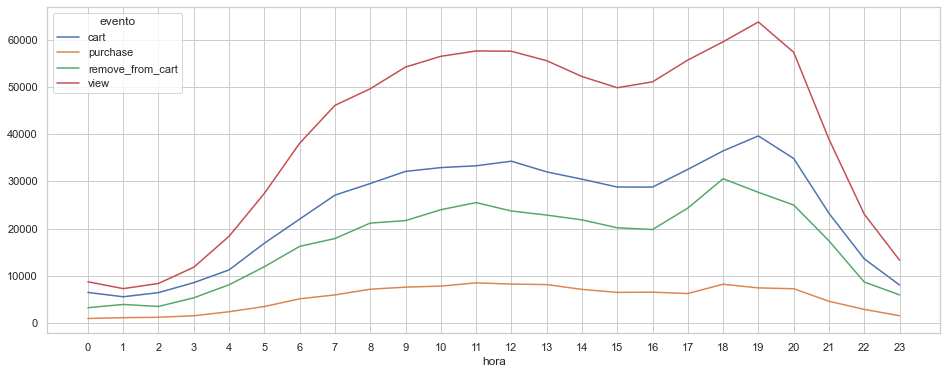

In [113]:
eventos_hora.plot(figsize=(16,6))
plt.xticks(ticks = eventos_hora.index);

Existe una pauta global como era de esperar.

Pero para ver mejor las diferencias se creará una nueva variable que sea el ratio de compras por visita en cada hora.

In [114]:
eventos_hora['compras_visitas'] = eventos_hora.purchase / eventos_hora.view * 100
eventos_hora

evento,cart,purchase,remove_from_cart,view,compras_visitas
hora,,,,,
0,6475,962,3238,8731,11.02
1,5555,1128,3930,7280,15.49
2,6433,1220,3509,8378,14.56
3,8544,1535,5331,11807,13.00
4,11242,2389,8095,18365,13.01
5,16890,3491,11913,27438,12.72
6,21993,5125,16223,38055,13.47
7,27069,5951,17883,46072,12.92
8,29526,7158,21156,49587,14.44


Reordenamos las variables

In [115]:
eventos_hora = eventos_hora[['view','cart','remove_from_cart','purchase','compras_visitas']]
eventos_hora

evento,view,cart,remove_from_cart,purchase,compras_visitas
hora,,,,,
0,8731,6475,3238,962,11.02
1,7280,5555,3930,1128,15.49
2,8378,6433,3509,1220,14.56
3,11807,8544,5331,1535,13.00
4,18365,11242,8095,2389,13.01
5,27438,16890,11913,3491,12.72
6,38055,21993,16223,5125,13.47
7,46072,27069,17883,5951,12.92
8,49587,29526,21156,7158,14.44


Visualizamos para ver si hay horas en las que se compra proporcionalmente más.

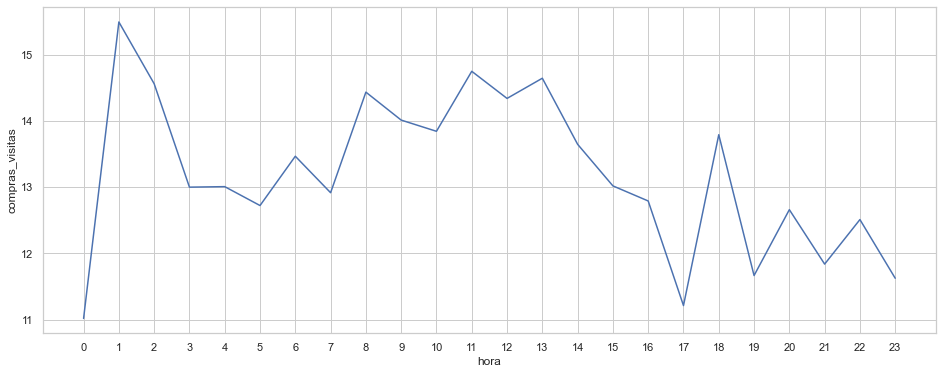

In [116]:
plt.figure(figsize = (16,6))
sns.lineplot(data = eventos_hora, x = eventos_hora.index, y = 'compras_visitas')
plt.xticks(eventos_hora.index);

Conclusiones:
    
* Las horas en las que la gente compra más son la 1, las 8, de 11 a 13 y las 18
* Las horas en las que la gente no compra son las 24, de 3 a 7, de 14 a 17 y de 19 a 23

Se analiza a continuación (en absoluto) si existen o no horas más frecuentes para cada tipo de evento.

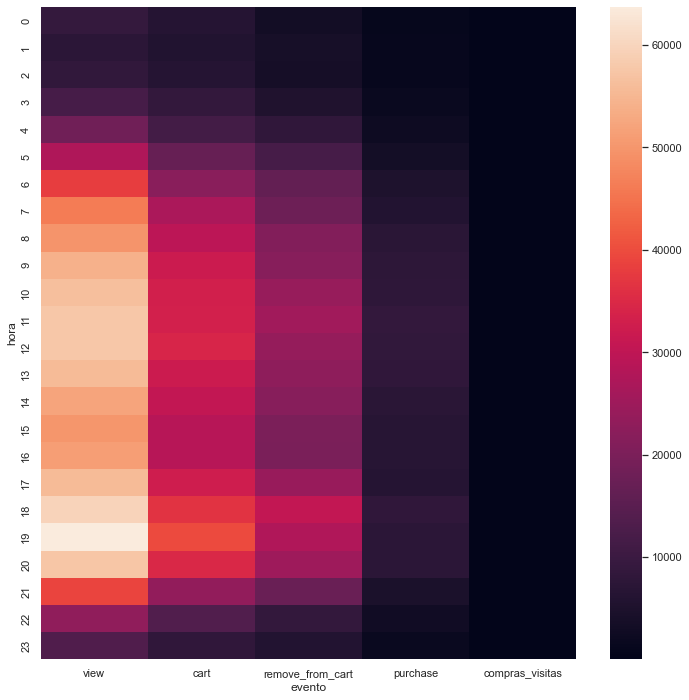

In [117]:
plt.figure(figsize = (12,12))
sns.heatmap(data = eventos_hora);

Problema: como cada evento tiene diferente escala este gráfico no nos permite diferenciar bien los patrones. Se tipificarán las variables para solucionarlo.

In [118]:
def tipificar(variable):
    media = variable.mean()
    dt = variable.std()
    return(variable.apply(lambda x: (x - media) / dt))

In [119]:
eventos_hora_tip = eventos_hora.apply(tipificar)
eventos_hora_tip

evento,view,cart,remove_from_cart,purchase,compras_visitas
hora,,,,,
0,-1.60,-1.56,-1.63,-1.62,-1.83
1,-1.68,-1.64,-1.54,-1.56,1.91
2,-1.62,-1.56,-1.59,-1.53,1.13
3,-1.45,-1.37,-1.38,-1.41,-0.17
4,-1.11,-1.13,-1.06,-1.09,-0.17
5,-0.65,-0.63,-0.61,-0.68,-0.41
6,-0.10,-0.17,-0.10,-0.07,0.22
7,0.31,0.28,0.09,0.24,-0.24
8,0.49,0.50,0.48,0.69,1.03


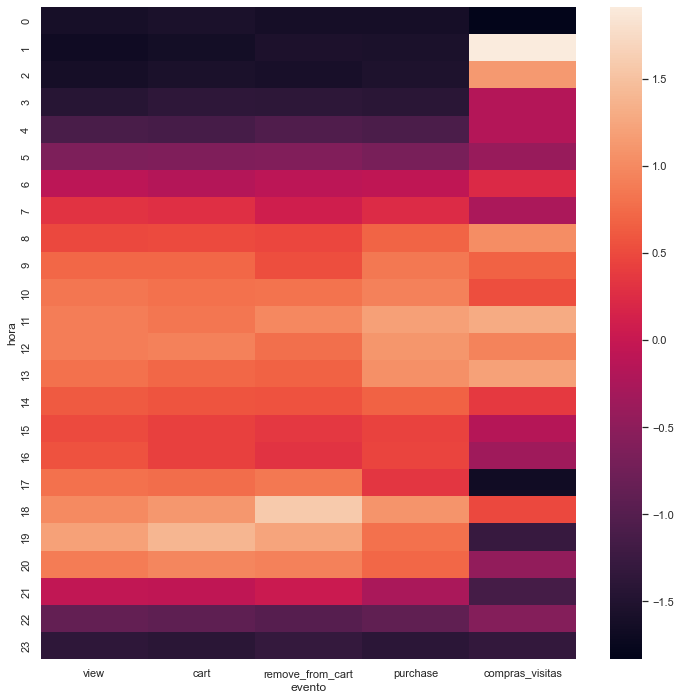

In [120]:
plt.figure(figsize = (12,12))
sns.heatmap(data = eventos_hora_tip);

Visualización de los gráficos de líneas para verlo más claramente.

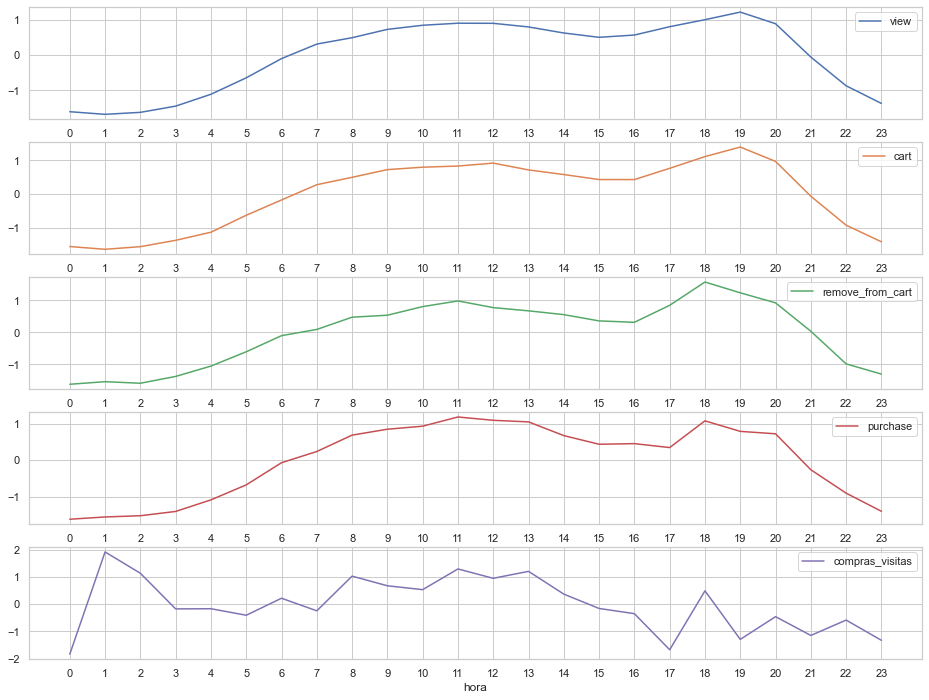

In [121]:
eventos_hora_tip.plot(subplots = True, sharex = False, figsize = (16,12),xticks = eventos_hora_tip.index);

Conclusiones:

* **INSIGHT #1**: Todas las métricas se maximzan en las franjas entre las 9 y las 13 y entre las 18 y las 20.
* Esta información es muy relevante de cara a campañas de paid ads, tanto de generación de tráfico como de retargeting.
* Además, parece haber algún subtipo de usuario que compra a la 1 de la mañana, que aunque no sea muy frecuente sí compra grandes cantidades.

### ¿Cúal es la media de facturación mensual?

In [122]:
df.loc[df.evento == 'purchase'].groupby('mes').precio.sum().mean()

124309.92

### ¿Cúal es la tendencia en los últimos meses?

In [ ]:
df.resample()

In [ ]:
tendencia = df.groupby('evento').resample('W', kind = 'period').evento.count().unstack(level = 0)
tendencia

In [ ]:
tendencia = tendencia[['view','cart','remove_from_cart','purchase']]
tendencia

In [ ]:
tendencia.plot(subplots = True, figsize = (12,6), sharex = True, xticks = tendencia.index, x_compat=True, rot = 90);

La tendencia es plana en todas las métricas, lo que confirma la necesidad de las acciones de CRO.

Existe un pico significativo en la semana del 24, obviamente por black friday, se realizará el mismo análisis pero a nivel diario y solo para noviembre y dicienbre para ver dicho efecto.

In [ ]:
tendencia_diaria = df.loc['2019-11':'2019-12'].groupby('evento').resample('D').evento.count().unstack(level = 0)
tendencia_diaria

In [ ]:
tendencia_diaria = tendencia_diaria[['view','cart','remove_from_cart','purchase']]
tendencia_diaria

In [ ]:
tendencia_diaria.plot(subplots = True, figsize = (16,10), sharex = True, xticks = tendencia_diaria.index, x_compat=True, rot = 90);

Conclusiones:

* Efectivamente el pico coincide con el black friday (día 29)
* Pero aún hay un pico mayor unos días antes, el día 22, posiblemente por el inicio de la semana black friday
* Sorprendemente los propios días de Navidad tienen una tendencia decreciente, lo que significa que los consumidores claramente han adelantado sus compras

Mismo análisis para Enero y Febrero.

In [ ]:
tendencia_diaria = df.loc['2020-01':'2020-02'].groupby('evento').resample('D').evento.count().unstack(level = 0)
tendencia_diaria = tendencia_diaria[['view','cart','remove_from_cart','purchase']]
tendencia_diaria.plot(subplots = True, figsize = (16,10), sharex = True, xticks = tendencia_diaria.index, x_compat=True, rot = 90);

Conclusiones:

* Durante la semana de Reyes tampoco hay pico de ventas
* Ni los días previos a San Valentín
* Pero sí hay un pico muy pronunciado el 27 de Enero, seguramente algún evento local

**INSIGHT #2** Todo el pastel de las compras navideñas se reparte en la semana del black friday

### ¿Momentos de la verdad?

¿Podríamos llegar a identificar momentos a nivel de día-hora en los que se producen el mayor número de compras?

Sería muy útil para concentrar gran parte de la inversión de campañas justo en esos momentos.

In [125]:
compras_dia_hora = df.loc[df.evento == 'purchase'].groupby(['date','hora']).evento.count().unstack(level = 0).fillna(0)
compras_dia_hora

date,2019-10-01,2019-10-02,2019-10-03,2019-10-04,2019-10-05,2019-10-06,2019-10-07,2019-10-08,2019-10-09,2019-10-10,...,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29
hora,,,,,,,,,,,,,,,,,,,,,
0,13.00,18.00,1.00,2.00,0.00,0.00,0.00,0.00,3.00,23.00,...,28.00,0.00,0.00,0.00,0.00,55.00,5.00,40.00,0.00,0.00
1,0.00,0.00,5.00,0.00,4.00,24.00,3.00,0.00,16.00,0.00,...,0.00,5.00,0.00,2.00,21.00,11.00,0.00,5.00,26.00,33.00
2,0.00,0.00,0.00,24.00,0.00,0.00,0.00,18.00,4.00,18.00,...,9.00,0.00,0.00,10.00,0.00,34.00,0.00,0.00,0.00,8.00
3,0.00,24.00,10.00,0.00,0.00,26.00,2.00,20.00,16.00,55.00,...,0.00,14.00,13.00,0.00,5.00,15.00,0.00,10.00,0.00,0.00
4,15.00,0.00,45.00,27.00,3.00,24.00,12.00,46.00,56.00,0.00,...,6.00,22.00,34.00,17.00,7.00,16.00,10.00,148.00,16.00,0.00
5,49.00,9.00,6.00,17.00,1.00,14.00,21.00,10.00,0.00,43.00,...,23.00,8.00,28.00,0.00,14.00,103.00,6.00,48.00,11.00,3.00
6,23.00,34.00,18.00,10.00,10.00,13.00,38.00,35.00,14.00,12.00,...,7.00,22.00,5.00,46.00,26.00,20.00,94.00,26.00,58.00,35.00
7,26.00,60.00,26.00,54.00,58.00,20.00,63.00,27.00,26.00,59.00,...,98.00,67.00,52.00,10.00,30.00,23.00,30.00,53.00,38.00,65.00
8,28.00,71.00,129.00,49.00,20.00,37.00,27.00,41.00,89.00,62.00,...,30.00,95.00,35.00,52.00,30.00,17.00,120.00,80.00,67.00,25.00


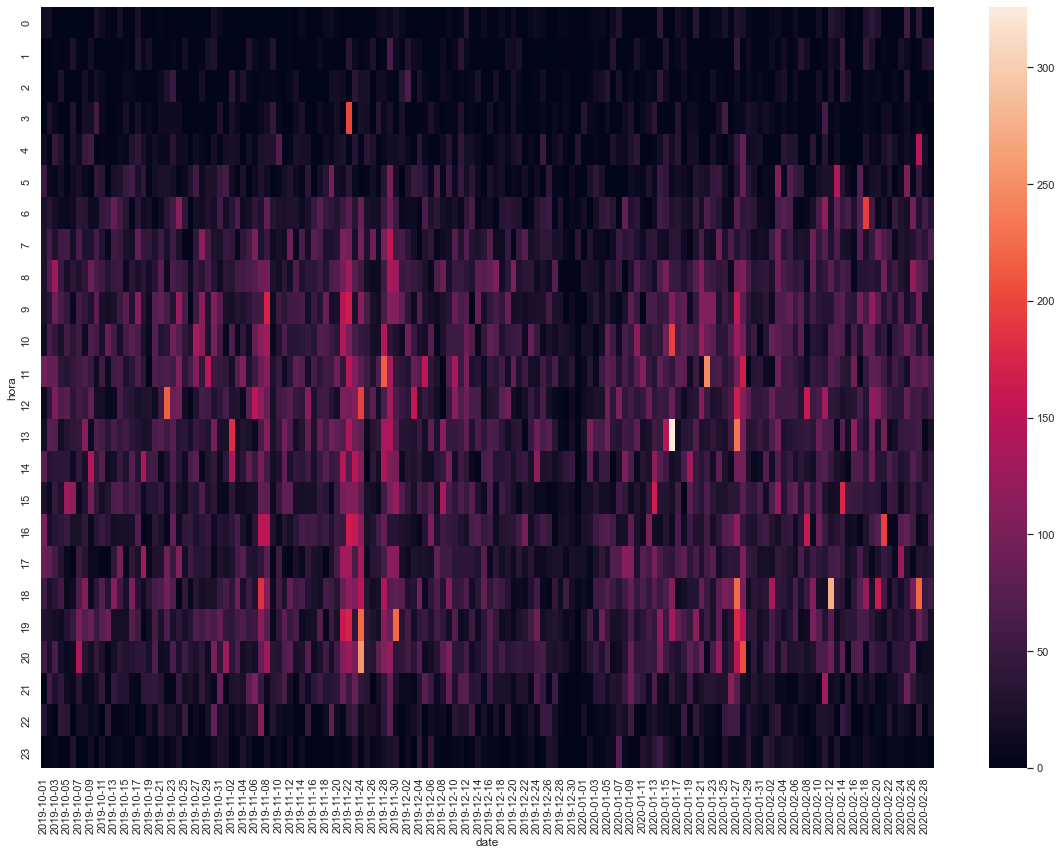

In [126]:
plt.figure(figsize = (20,14))
sns.heatmap(compras_dia_hora);

## Entendiendo los clientes

Para analizar a nivel de cliente lo mejor es crear un dataframe de solo compradores con granularidad cliente y las variables de interés.

In [128]:
clientes = df.loc[df.evento == 'purchase'].groupby(['usuario']).agg({'producto':'count',
                                                          'sesion':'nunique', 
                                                          'precio': 'mean',
                                                          'date': 'max'})

clientes

,producto,sesion,precio,date
usuario,,,,
25392526,3,1,7.38,2019-12-18
27756757,1,1,20.63,2020-01-27
50748978,9,1,1.11,2019-12-14
52747911,3,1,7.67,2019-10-10
65241811,5,1,8.36,2019-11-11
...,...,...,...,...
621995551,5,1,2.09,2020-02-29
622021687,1,1,13.33,2020-02-29
622041514,3,1,0.63,2020-02-29


Renombramos

In [129]:
clientes.columns = ['productos_tot_num','compras_tot_num','precio_medio_prod','ult_compra']
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra
usuario,,,,
25392526,3,1,7.38,2019-12-18
27756757,1,1,20.63,2020-01-27
50748978,9,1,1.11,2019-12-14
52747911,3,1,7.67,2019-10-10
65241811,5,1,8.36,2019-11-11
...,...,...,...,...
621995551,5,1,2.09,2020-02-29
622021687,1,1,13.33,2020-02-29
622041514,3,1,0.63,2020-02-29


Cálculo de variables adicionales.

In [130]:
clientes['gasto_tot'] = clientes.productos_tot_num * clientes.precio_medio_prod
clientes['productos_por_compra'] = clientes.productos_tot_num / clientes.compras_tot_num
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra,gasto_tot,productos_por_compra
usuario,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00
27756757,1,1,20.63,2020-01-27,20.63,1.00
50748978,9,1,1.11,2019-12-14,10.01,9.00
52747911,3,1,7.67,2019-10-10,23.02,3.00
65241811,5,1,8.36,2019-11-11,41.79,5.00
...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00
622021687,1,1,13.33,2020-02-29,13.33,1.00
622041514,3,1,0.63,2020-02-29,1.90,3.00


### ¿Cómo se distribuyen los clientes en cuanto a gasto?

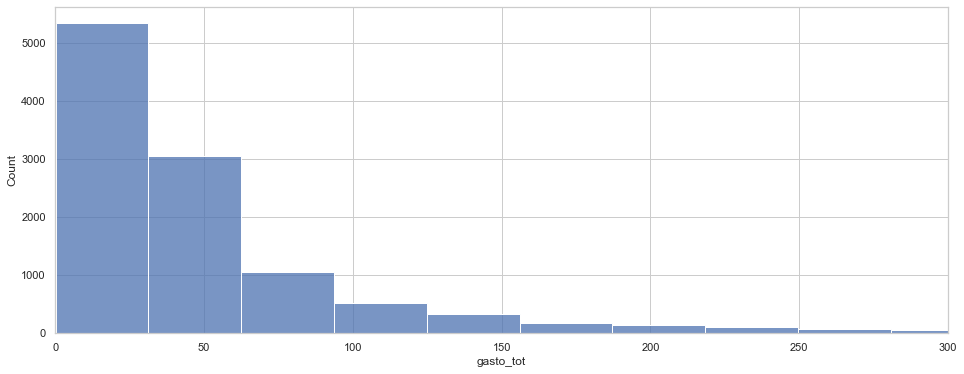

In [131]:
plt.subplots(figsize=(16,6))
sns.histplot(data = clientes, x = 'gasto_tot', bins = 50)
plt.xlim([0,300]);

La gran mayoría de los clientes han gastado menos de 50€ en el período.

### ¿Cómo se distribuyen los clientes en cuanto al número de compras?

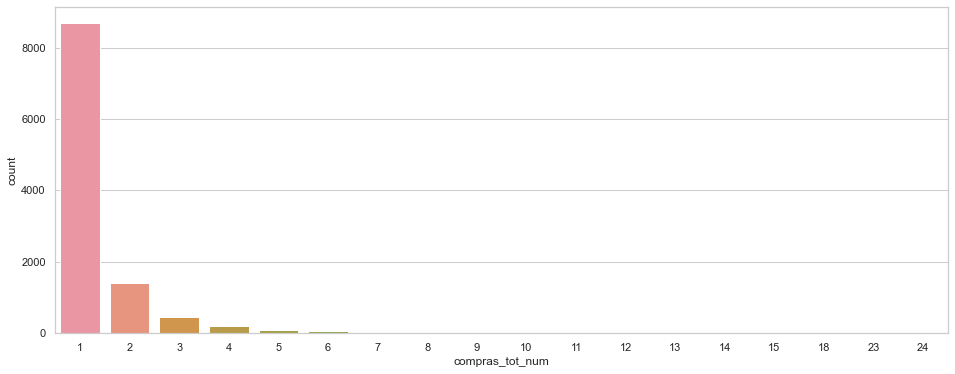

In [132]:
plt.subplots(figsize=(16,6))
sns.countplot(data = clientes, x = 'compras_tot_num');

**INSIGHT #3** La gran mayoría de los clientes sólo hace una compra.

Existe gran recorrido para mejorar este ratio mediante:

* email marketing con newletters y ofertas personalizadas.

### ¿Cuántos productos compra un cliente de media en cada compra?

In [133]:
clientes.productos_por_compra.describe()

count          11040.00
mean               7.79
std                9.49
min                1.00
25%                3.00
50%                5.00
75%               10.00
max              219.00
Name: productos_por_compra, dtype: float64

**INSIGHT #4** La compra mediana incluye 5 productos.

Pero un 25% de los clientes compran más de 10 productos en la misma compra.

Existe gran recorrido para mejorar este ratio mediante:

* sistemas de recomendación en el momento de la compra

### ¿Qué clientes nos han generado más ingresos?

In [134]:
clientes.nlargest(n = 10, columns = 'gasto_tot')

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra,gasto_tot,productos_por_compra
usuario,,,,,,
573823111,268,2,5.82,2020-02-21,1559.21,134.00
539751397,236,13,6.16,2020-02-19,1453.37,18.15
556579890,506,4,2.75,2020-02-27,1392.45,126.50
442763940,195,8,6.37,2019-12-23,1241.53,24.38
561592095,94,3,11.81,2019-10-31,1109.70,31.33
527739278,244,13,4.39,2020-02-16,1071.00,18.77
527806771,195,13,4.86,2020-02-20,948.01,15.00
430220205,190,6,4.99,2020-02-29,947.30,31.67
491009486,219,1,4.32,2020-02-12,946.20,219.00


Gasto total medio por cliente.

In [135]:
clientes.gasto_tot.describe()

count          11040.00
mean              56.30
std               81.73
min                0.13
25%               16.22
50%               32.74
75%               60.30
max             1559.21
Name: gasto_tot, dtype: float64

**INSIGHT #5** Existen clientes con gasto medio decenas de veces superior a la media.

Hay que fidelizar estos clientes mediante programas de fidelización.

### ¿Cual es la supervivencia de los clientes?

Dado que solo se dispone de 5 meses de histórico, se creará un análisis de cohortes a 3 meses vista, lo cual da para hacer 3 cohortes.

Dataframe solo con compradores y con las variables usuario y mes.

In [136]:
c = df.loc[df.evento == 'purchase', ['usuario','mes']]
c

,usuario,mes
fecha,,
2019-10-01 00:26:49,536128518,10
2019-10-01 00:26:49,536128518,10
2019-10-01 00:26:49,536128518,10
2019-10-01 00:26:49,536128518,10
2019-10-01 00:26:49,536128518,10
...,...,...
2020-02-29 22:29:19,622065819,2
2020-02-29 22:29:19,622065819,2
2020-02-29 22:29:19,622065819,2


Pasamos los meses a columnas.

In [138]:
c = pd.crosstab(c.usuario,c.mes).reset_index()
c

mes,usuario,1,2,10,11,12
0,25392526,0,0,0,0,3
1,27756757,1,0,0,0,0
2,50748978,0,0,0,0,9
3,52747911,0,0,3,0,0
4,65241811,0,0,0,5,0
...,...,...,...,...,...,...
11035,621995551,0,5,0,0,0
11036,622021687,0,1,0,0,0
11037,622041514,0,3,0,0,0
11038,622042698,0,3,0,0,0


Renombramos y eliminamos el usuario que ya no lo necesitamos.

In [139]:
c.columns = ['usuario','c4','c5','c1','c2','c3']
c.drop(columns = 'usuario', inplace = True)
c

,c4,c5,c1,c2,c3
0,0,0,0,0,3
1,1,0,0,0,0
2,0,0,0,0,9
3,0,0,3,0,0
4,0,0,0,5,0
...,...,...,...,...,...
11035,0,5,0,0,0
11036,0,1,0,0,0
11037,0,3,0,0,0
11038,0,3,0,0,0


La primera cohorte será la del mes 2, ya que queremos seleccionar "nuevos" clientes (al menos que no estuvieran el mes anterior)

In [140]:
c2 = c.loc[(c.c1 == 0) & (c.c2 > 0)]
c2

,c4,c5,c1,c2,c3
4,0,0,0,5,0
6,0,0,0,10,0
8,0,0,0,27,17
9,0,0,0,3,0
13,0,0,0,4,0
...,...,...,...,...,...
7702,0,0,0,5,0
7703,0,5,0,2,0
7705,0,0,0,1,0
7708,0,0,0,5,6


Pasamos a un dataframe binario ya que solo nos importa si ese cliente ha comprado o no en cada mes.

In [141]:
def binarizar(variable):
    variable = variable.transform(lambda x: 1 if (x > 0) else 0)
    return(variable)

In [142]:
c2_b = c2.apply(binarizar)
c2_b

,c4,c5,c1,c2,c3
4,0,0,0,1,0
6,0,0,0,1,0
8,0,0,0,1,1
9,0,0,0,1,0
13,0,0,0,1,0
...,...,...,...,...,...
7702,0,0,0,1,0
7703,0,1,0,1,0
7705,0,0,0,1,0
7708,0,0,0,1,1


Calcumamos el porcentaje de clientes de esta cohorte que han seguido comprando en los siguientes meses.

In [143]:
c2_f = c2_b.sum() / c2_b.shape[0]
c2_f = c2_f.sort_index()
c2_f

c1              0.00
c2              1.00
c3              0.10
c4              0.10
c5              0.08
dtype: float64

Replicamos todo el proceso para la cohorte 3

In [144]:
c3 = c.loc[(c.c2 == 0) & (c.c3 > 0)]
c3_b = c3.apply(binarizar)
c3_f = c3_b.sum() / c3_b.shape[0]
c3_f = c3_f.sort_index()
c3_f['c1'] = 0
c3_f

c1              0.00
c2              0.00
c3              1.00
c4              0.10
c5              0.08
dtype: float64

Replicamos todo el proceso para la cohorte 4

In [145]:
c4 = c.loc[(c.c3 == 0) & (c.c4 > 0)]
c4_b = c4.apply(binarizar)
c4_f = c4_b.sum() / c4_b.shape[0]
c4_f = c4_f.sort_index()
c4_f['c1'] = 0
c4_f['c2'] = 0
c4_f

c1              0.00
c2              0.00
c3              0.00
c4              1.00
c5              0.12
dtype: float64

Creamos el dataframe de cohortes.

In [146]:
cohortes = pd.DataFrame({'c2':c2_f,'c3':c3_f,'c4':c4_f})
cohortes

,c2,c3,c4
c1,0.00,0.00,0.00
c2,1.00,0.00,0.00
c3,0.10,1.00,0.00
c4,0.10,0.10,1.00
c5,0.08,0.08,0.12


In [147]:
cohortes = cohortes.drop(index = 'c1').T
cohortes

,c2,c3,c4,c5
c2,1.00,0.10,0.10,0.08
c3,0.00,1.00,0.10,0.08
c4,0.00,0.00,1.00,0.12


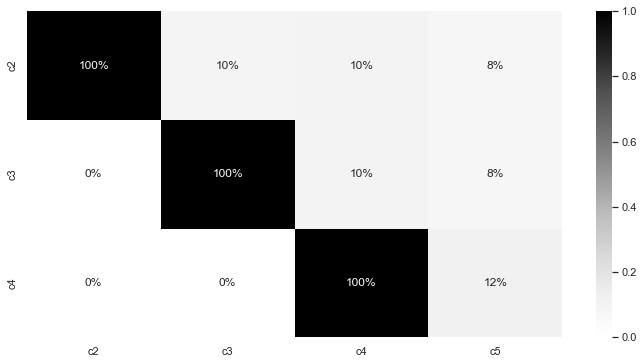

In [149]:
plt.figure(figsize = (12,6))
sns.heatmap(cohortes,annot = True, fmt = '.0%', cmap='Greys');

**INSIGHT #6**: El 90% de que los nuevos clientes no vuelve a comprar en los meses posteriores

### ¿Cual es el LTV de los clientes?

Teniendo en cuenta el 90% de que los nuevos clientes no vuelve a comprar en los meses posteriores podemos calcular el LTV con el histórico que tenemos con precisión aceptable.

Para ello se seleccionará a los clientes de la cohorte 2 y se calculará el total de sus compras.

In [150]:
maestro_ltv = df.loc[(df.evento == 'purchase') & (df.mes != 10) & (df.mes == 11),'usuario'].to_list()
maestro_ltv

[549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 549319657,
 566322866,
 566322866,
 566322866,
 566322866,
 566322866,
 566322866,
 566322866,
 566322866,
 491040843,
 491040843,
 491040843,
 491040843,
 491040843,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 448281768,
 483964876,
 483964876,
 483964876,
 483964876,
 483964876,
 483964876,
 483964876,
 497964079,
 497964079,
 497964079,
 497964079,
 566332999,
 551059137,
 539216862,
 539216862,
 539216862,
 539216862,
 539

In [151]:
clientes_ltv = clientes.loc[clientes.index.isin(maestro_ltv)]
clientes_ltv

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra,gasto_tot,productos_por_compra
usuario,,,,,,
65241811,5,1,8.36,2019-11-11,41.79,5.00
80577370,10,2,10.62,2019-11-29,106.24,5.00
88211255,22,4,4.86,2020-02-25,106.87,5.50
93279832,44,2,3.19,2019-12-19,140.51,22.00
94390236,3,1,9.73,2019-11-07,29.20,3.00
...,...,...,...,...,...,...
579798049,5,1,2.10,2019-11-30,10.52,5.00
579813390,7,2,2.98,2020-02-04,20.83,3.50
579834429,1,1,27.14,2019-11-30,27.14,1.00


In [152]:
clientes_ltv.gasto_tot.describe()

count           3105.00
mean              79.62
std              113.62
min                0.13
25%               20.29
50%               41.49
75%               90.00
max             1453.37
Name: gasto_tot, dtype: float64

Dada la variabilidad de la media sería más conservador emplear la mediana.

**INSIGHT #7**: El LTV medio es de 42€.

Aplicando el margen de la compañía sobre esa cifra y el % que se desea dedicar a captación, se obtiene el importe máximo a invertir en CPA.

Aplicar las acciones de CRO permitirá incrementar el LTV y por tanto también el CPA, siendo una ventaja estratégica muy importante.

### ¿Sobre qué clientes ejecutar las próximas campañas (RFM)?

Se empleará la técnica conocida como segmentación RFM (Recency - Frequency - Monetary).

Esta técnica es muy potente para contextos de retail y por tanto también en ecommerce.

Permite dar respuesta a necesidades como:

* Cuál es la proporción de clientes que realizan un solo pedido y clientes frecuentes.
* Cuales son los clientes VIP (que potencialmente necesitan programas de fidelización y atención personalizada).
* Cuál es la cantidad de clientes nuevos (a incentivar para que vuelvan a realizar un pedido).
* Cuántos y cuáles son los clientes que no realizan compras hace tiempo.
* Cuántos y cuáles son los clientes en los cuales no vale la pena invertir más tiempo y recursos.
* ...

Pese a su potencia es sencilla de construir, por tanto es casi obligatoria en este tipo de análisis.

Primero se identificarán las variables con las que crear cada una de las dimensiones:

* Recency: `ult_compra`
* Frequency: `compras_tot_num`
* Monetary: `gasto_tot`

Y se discretizará cada una de ellas.

Frequency:

In [153]:
clientes['F'] = clientes.compras_tot_num.transform(lambda x: pd.cut(x,5, labels = False)) + 1
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra,gasto_tot,productos_por_compra,F
usuario,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1
27756757,1,1,20.63,2020-01-27,20.63,1.00,1
50748978,9,1,1.11,2019-12-14,10.01,9.00,1
52747911,3,1,7.67,2019-10-10,23.02,3.00,1
65241811,5,1,8.36,2019-11-11,41.79,5.00,1
...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1
622021687,1,1,13.33,2020-02-29,13.33,1.00,1
622041514,3,1,0.63,2020-02-29,1.90,3.00,1


Comprobación:

In [154]:
clientes.groupby('F').compras_tot_num.mean()

F
1              1.31
2              7.06
3             12.00
4             16.50
5             23.50
Name: compras_tot_num, dtype: float64

Monetary:

In [155]:
clientes['M'] = clientes.gasto_tot.transform(lambda x: pd.cut(x,5, labels = False)) + 1
clientes.groupby('M').gasto_tot.mean()

M
1             48.36
2            410.98
3            765.18
4           1043.96
5           1468.34
Name: gasto_tot, dtype: float64

Recencia: hay que transformar la fecha a un número, por ejemplo la distancia en días de cada fecha a la fecha más reciente disponible.

In [156]:
mas_reciente = clientes.ult_compra.max()

clientes['ult_compra_dias'] = clientes.ult_compra.transform(lambda x: mas_reciente - x)

clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra,gasto_tot,productos_por_compra,F,M,ult_compra_dias
usuario,,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73 days
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33 days
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77 days
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142 days
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110 days
...,...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0 days
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0 days
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0 days


Se ha creado un timedelta, que será transformado a número de días.

In [157]:
clientes['ult_compra_dias'] = clientes.ult_compra_dias.dt.days
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra,gasto_tot,productos_por_compra,F,M,ult_compra_dias
usuario,,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110
...,...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0


Creación de Recencia:

In [158]:
clientes['R'] = clientes.ult_compra_dias.transform(lambda x: pd.cut(x,5, labels = False)) + 1
clientes.groupby('R').ult_compra_dias.mean()

R
1             14.62
2             43.04
3             75.94
4            103.85
5            135.91
Name: ult_compra_dias, dtype: float64

Para estandarizar su intrepretación con el resto de las dimensiones se invertirá.

In [159]:
clientes['R'] = 6 - clientes.R
clientes.groupby('R').ult_compra_dias.mean()

R
1            135.91
2            103.85
3             75.94
4             43.04
5             14.62
Name: ult_compra_dias, dtype: float64

Integración en dataframe rfm.

In [160]:
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra,gasto_tot,productos_por_compra,F,M,ult_compra_dias,R
usuario,,,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73,3
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33,4
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77,3
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142,1
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110,2
...,...,...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0,5
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0,5
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0,5


Creación de variables adicionales.

In [161]:
clientes['valor'] = clientes.R + clientes.F + clientes.M
clientes['RFM'] = clientes.apply(lambda x: str(x.R) + str(x.F) + str(x.M), axis = 1)
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra,gasto_tot,productos_por_compra,F,M,ult_compra_dias,R,valor,RFM
usuario,,,,,,,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00,1,1,73,3,5,311
27756757,1,1,20.63,2020-01-27,20.63,1.00,1,1,33,4,6,411
50748978,9,1,1.11,2019-12-14,10.01,9.00,1,1,77,3,5,311
52747911,3,1,7.67,2019-10-10,23.02,3.00,1,1,142,1,3,111
65241811,5,1,8.36,2019-11-11,41.79,5.00,1,1,110,2,4,211
...,...,...,...,...,...,...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00,1,1,0,5,7,511
622021687,1,1,13.33,2020-02-29,13.33,1.00,1,1,0,5,7,511
622041514,3,1,0.63,2020-02-29,1.90,3.00,1,1,0,5,7,511


Sobre este dataframe pueden hacerse infinidad de análisis.

In [162]:
metricas = ['productos_tot_num','compras_tot_num','gasto_tot']
dimensiones = ['R','F','M','RFM','valor']

minicubo = clientes[dimensiones + metricas]
minicubo

,R,F,M,RFM,valor,productos_tot_num,compras_tot_num,gasto_tot
usuario,,,,,,,,
25392526,3,1,1,311,5,3,1,22.14
27756757,4,1,1,411,6,1,1,20.63
50748978,3,1,1,311,5,9,1,10.01
52747911,1,1,1,111,3,3,1,23.02
65241811,2,1,1,211,4,5,1,41.79
...,...,...,...,...,...,...,...,...
621995551,5,1,1,511,7,5,1,10.46
622021687,5,1,1,511,7,1,1,13.33
622041514,5,1,1,511,7,3,1,1.90


In [163]:
minicubo = minicubo.melt(id_vars = metricas)
minicubo

,productos_tot_num,compras_tot_num,gasto_tot,variable,value
0,3,1,22.14,R,3
1,1,1,20.63,R,4
2,9,1,10.01,R,3
3,3,1,23.02,R,1
4,5,1,41.79,R,2
...,...,...,...,...,...
55195,5,1,10.46,valor,7
55196,1,1,13.33,valor,7
55197,3,1,1.90,valor,7
55198,3,1,84.13,valor,7


In [164]:
minicubo = minicubo.groupby(['variable','value'], as_index = False)[metricas].mean()
minicubo

,variable,value,productos_tot_num,compras_tot_num,gasto_tot
0,F,1,10.61,1.31,52.09
1,F,2,71.42,7.06,320.47
2,F,3,123.64,12.00,643.20
3,F,4,156.75,16.50,560.15
4,F,5,124.00,23.50,652.42
...,...,...,...,...,...
58,valor,9,98.02,7.25,491.71
59,valor,10,140.89,10.22,625.93
60,valor,11,291.00,5.75,1189.31
61,valor,12,189.80,16.60,833.43


In [165]:
minicubo[minicubo.variable == 'F']

,variable,value,productos_tot_num,compras_tot_num,gasto_tot
0,F,1,10.61,1.31,52.09
1,F,2,71.42,7.06,320.47
2,F,3,123.64,12.00,643.20
3,F,4,156.75,16.50,560.15
4,F,5,124.00,23.50,652.42


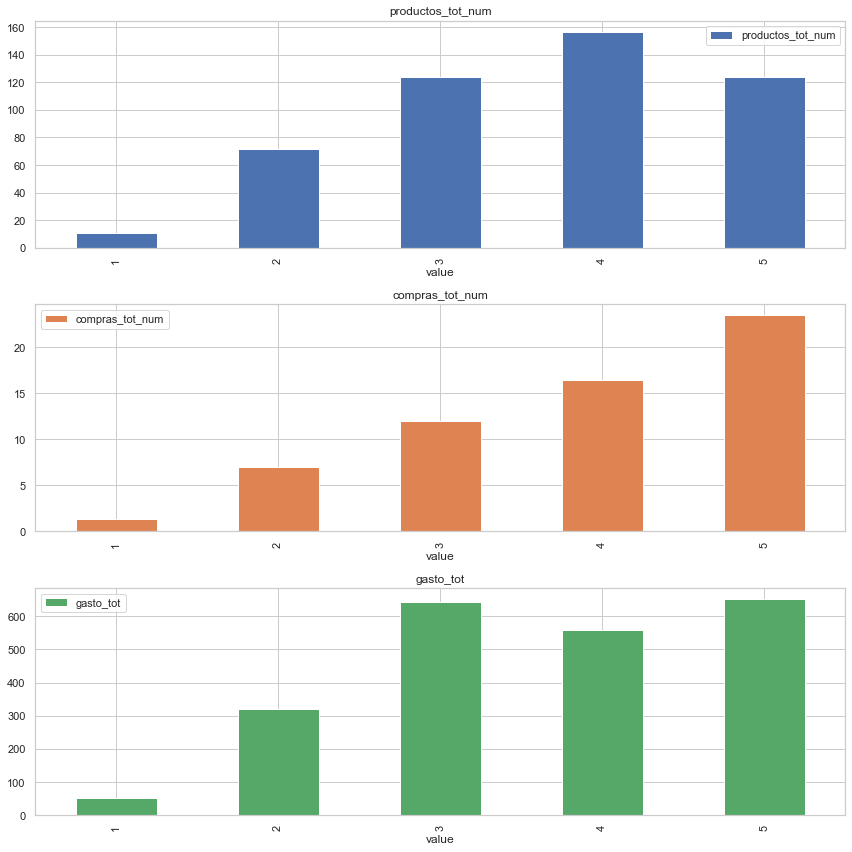

In [166]:
minicubo[minicubo.variable == 'F'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

In [167]:
minicubo[minicubo.variable == 'R']

,variable,value,productos_tot_num,compras_tot_num,gasto_tot
10,R,1,8.15,1.08,41.56
11,R,2,9.25,1.18,45.58
12,R,3,9.54,1.29,47.25
13,R,4,11.72,1.44,58.19
14,R,5,16.83,1.82,79.04


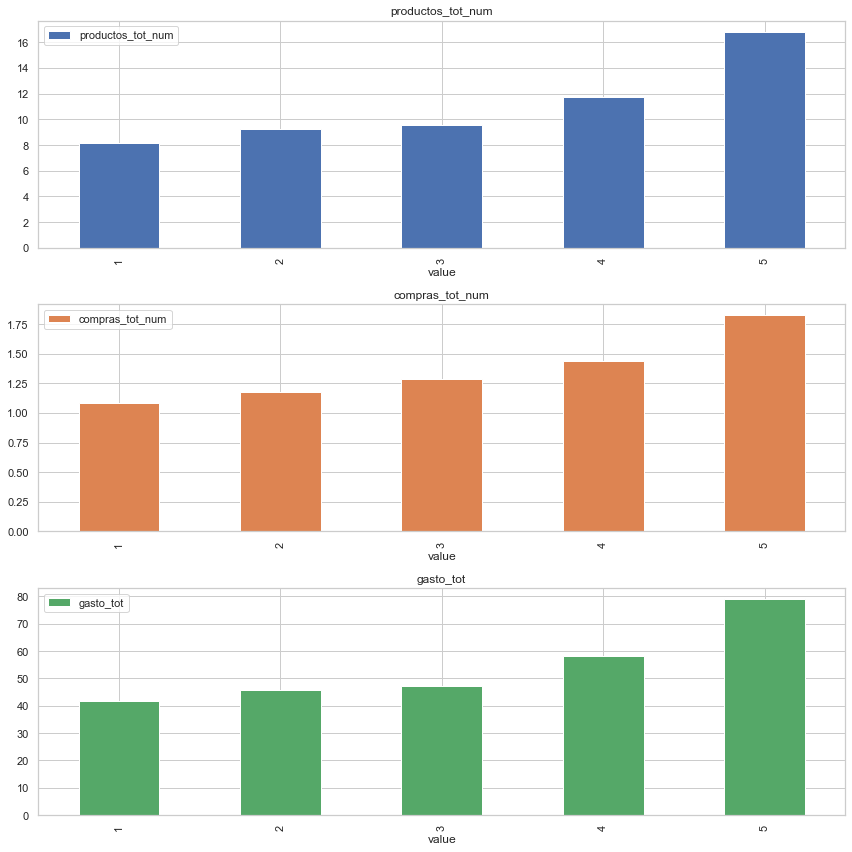

In [168]:
minicubo[minicubo.variable == 'R'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

In [169]:
minicubo[minicubo.variable == 'M']

,variable,value,productos_tot_num,compras_tot_num,gasto_tot
5,M,1,10.12,1.34,48.36
6,M,2,74.28,4.31,410.98
7,M,3,138.50,6.86,765.18
8,M,4,189.50,7.33,1043.96
9,M,5,336.67,6.33,1468.34


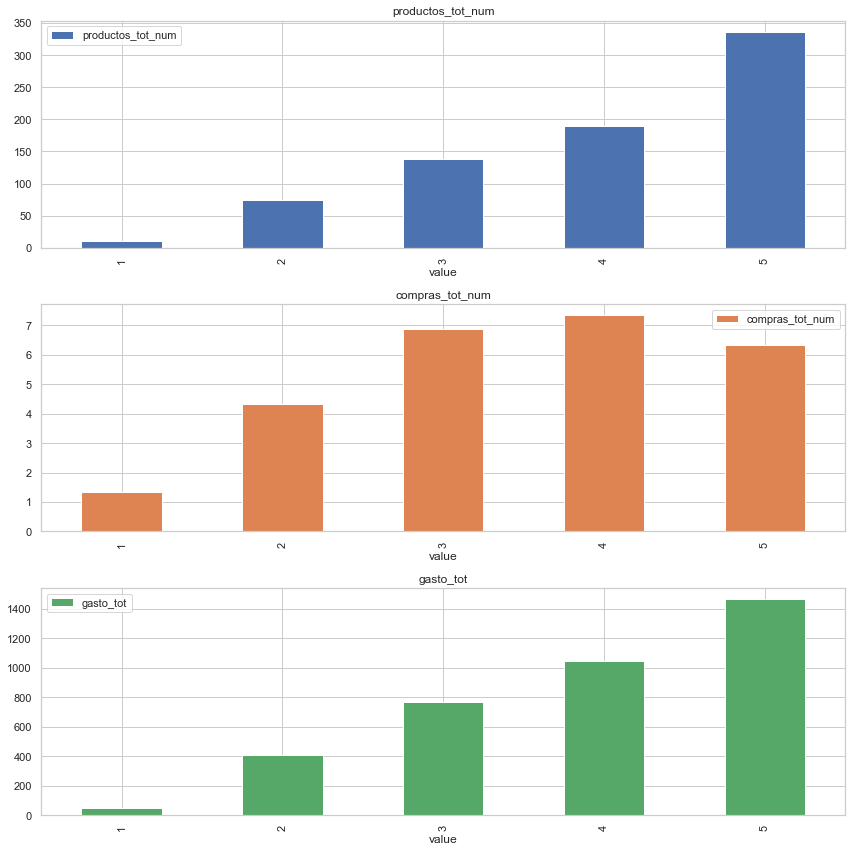

In [170]:
minicubo[minicubo.variable == 'M'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

In [171]:
minicubo[minicubo.variable == 'RFM']

,variable,value,productos_tot_num,compras_tot_num,gasto_tot
15,RFM,111,7.97,1.08,39.28
16,RFM,112,37.38,1.50,397.98
17,RFM,114,94.00,3.00,1109.70
18,RFM,211,8.94,1.17,43.16
19,RFM,212,47.00,1.73,391.14
20,RFM,213,35.50,1.00,662.84
21,RFM,221,85.67,6.33,194.48
22,RFM,311,8.98,1.26,43.91
23,RFM,312,53.46,2.46,376.38
24,RFM,321,39.00,6.50,141.28


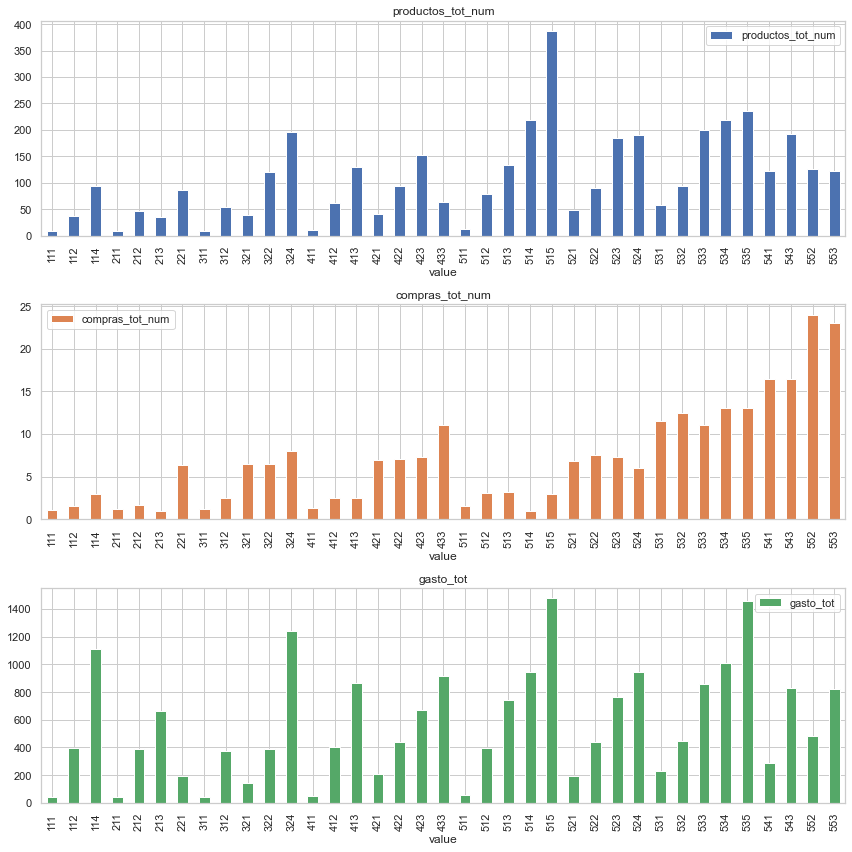

In [172]:
minicubo[minicubo.variable == 'RFM'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

In [173]:
minicubo[minicubo.variable == 'valor']

,variable,value,productos_tot_num,compras_tot_num,gasto_tot
52,valor,3,7.97,1.08,39.28
53,valor,4,9.04,1.17,44.41
54,valor,5,9.31,1.27,46.08
55,valor,6,10.73,1.38,53.07
56,valor,7,12.64,1.54,60.42
57,valor,8,66.13,5.06,313.01
58,valor,9,98.02,7.25,491.71
59,valor,10,140.89,10.22,625.93
60,valor,11,291.00,5.75,1189.31
61,valor,12,189.80,16.60,833.43


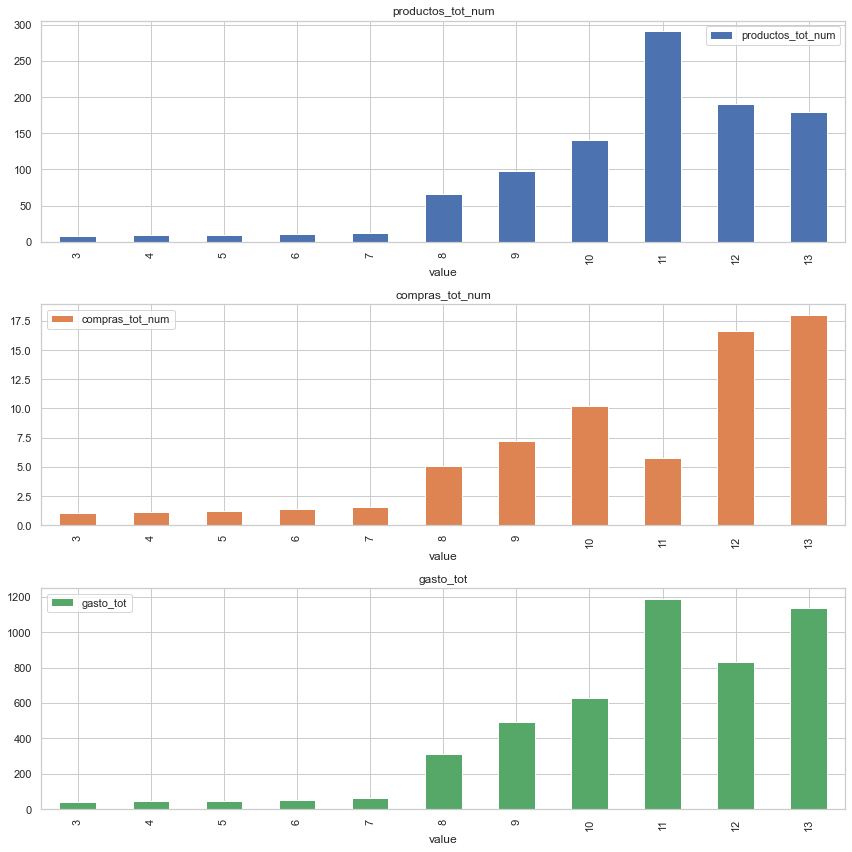

In [174]:
minicubo[minicubo.variable == 'valor'].set_index('value').plot.bar(subplots = True, sharex = False, figsize = (12,12))
plt.tight_layout();

Se podría mejorar el análisis porque en F y M los atípicos hacen que se concentren la mayoría de los datos en la categoría 1. Sería recomendable eliminar esos atípicos y volver a realizar el ejercicio.

Con este análisis se han identificado los clientes que con mayor probabilidad responderán mejor a nuevas campañas, además de obtener un multitud de insights valiosos para el negocio.

## Entendiendo los productos

Creación de dataframe a nivel de producto para poder analizar esta dimensión.

Cálculo de conteos de cada evento en cada producto.

In [175]:
prod = df.groupby(['producto','evento']).size()
prod

producto  evento          
3752      cart                  0
          purchase              0
          remove_from_cart      0
          view                 10
3762      cart                127
                             ... 
5932578   view                  1
5932585   cart                  0
          purchase              0
          remove_from_cart      0
          view                  2
Length: 181308, dtype: int64

In [176]:
prod  = prod.unstack(level = 1).fillna(0)
prod

evento,cart,purchase,remove_from_cart,view
producto,,,,
3752,0,0,0,10
3762,127,28,59,258
3763,10,2,2,51
3771,0,0,0,9
3774,26,7,13,76
...,...,...,...,...
5932537,1,0,0,1
5932538,0,0,0,1
5932540,1,0,0,2


Incorporación del precio, para ello creando en primer lugar un maestro de precios por producto.

In [177]:
maestro_precios = df.groupby('producto', as_index = False).precio.mean()
maestro_precios

,producto,precio
0,3752,15.71
1,3762,19.29
2,3763,16.00
3,3771,15.08
4,3774,15.92
...,...,...
45322,5932537,1.43
45323,5932538,1.43
45324,5932540,1.43
45325,5932578,6.02


In [178]:
prod = pd.merge(left = prod, right = maestro_precios, how = 'left', on = 'producto')
prod

,producto,cart,purchase,remove_from_cart,view,precio
0,3752,0,0,0,10,15.71
1,3762,127,28,59,258,19.29
2,3763,10,2,2,51,16.00
3,3771,0,0,0,9,15.08
4,3774,26,7,13,76,15.92
...,...,...,...,...,...,...
45322,5932537,1,0,0,1,1.43
45323,5932538,0,0,0,1,1.43
45324,5932540,1,0,0,2,1.43
45325,5932578,0,0,0,1,6.02


Reordenando los nombres.

In [179]:
prod

,producto,cart,purchase,remove_from_cart,view,precio
0,3752,0,0,0,10,15.71
1,3762,127,28,59,258,19.29
2,3763,10,2,2,51,16.00
3,3771,0,0,0,9,15.08
4,3774,26,7,13,76,15.92
...,...,...,...,...,...,...
45322,5932537,1,0,0,1,1.43
45323,5932538,0,0,0,1,1.43
45324,5932540,1,0,0,2,1.43
45325,5932578,0,0,0,1,6.02


In [180]:
prod = prod[['producto','view','cart','remove_from_cart','purchase','precio']]
prod

,producto,view,cart,remove_from_cart,purchase,precio
0,3752,10,0,0,0,15.71
1,3762,258,127,59,28,19.29
2,3763,51,10,2,2,16.00
3,3771,9,0,0,0,15.08
4,3774,76,26,13,7,15.92
...,...,...,...,...,...,...
45322,5932537,1,1,0,0,1.43
45323,5932538,1,0,0,0,1.43
45324,5932540,2,1,0,0,1.43
45325,5932578,1,0,0,0,6.02


### ¿Cuales son los productos más vendidos?

In [181]:
prod.sort_values('purchase',ascending = False)[0:20]

,producto,view,cart,remove_from_cart,purchase,precio
16807,5809910,9195,2796,1249,764,5.21
28178,5854897,624,2486,793,483,0.32
6644,5700037,1150,2603,716,361,0.40
314,5304,516,1184,426,341,0.32
9900,5751422,2204,1119,625,331,10.87
15394,5802432,701,2495,745,322,0.32
16809,5809912,3059,1352,863,321,5.19
18415,5815662,1219,1697,653,310,0.91
9862,5751383,2341,1035,550,298,10.24
14043,5792800,1527,911,512,285,10.25


Posiblemente lograríamos incrementar las ventas y el ticket medio simplemente destacando estos productos en la tienda.

### ¿Hay productos que no se venden y podríamos eliminar del catálogo?

In [182]:
prod[prod.purchase == 0]

,producto,view,cart,remove_from_cart,purchase,precio
0,3752,10,0,0,0,15.71
3,3771,9,0,0,0,15.08
6,3790,10,0,0,0,7.92
8,3809,2,0,0,0,12.54
9,3812,1,0,0,0,12.54
...,...,...,...,...,...,...
45322,5932537,1,1,0,0,1.43
45323,5932538,1,0,0,0,1.43
45324,5932540,2,1,0,0,1.43
45325,5932578,1,0,0,0,6.02


**INSIGHT #8**: Casi la mitad de los productos no han tenido ninguna venta en los 5 meses del histórico.

Se podría comenzar todo un nuevo análisis sobre estos productos:

* ¿No se ven?
* ¿Se ven pero no se compran?
* ¿Es porque se sustituyen por otros productos propios?
* ¿Es porque están mucho más baratos en la competencia?
* Etc

Se podrían eliminar del catálogo, o como mínimo de la tienda, newsletter, etc, para que no ocupen espacio de los productos que sí se venden.

### ¿Cual es la relación entre el precio y el volumen de ventas?

Ya que este análisis incluye las ventas vamos a eliminar los productos que no han tenido ninguna.

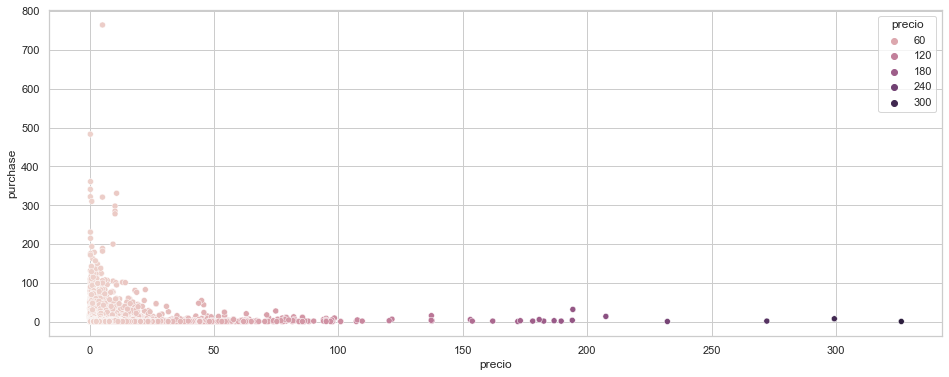

In [183]:
plt.subplots(figsize=(16,6))
sns.scatterplot(data = prod[prod.purchase > 0], x = 'precio', y = 'purchase', hue = 'precio');

Sí que existe una clara relación decreciente.

Vamos a hacer zoom por ejemplo por debajo de 50€ para entenderlo mejor.

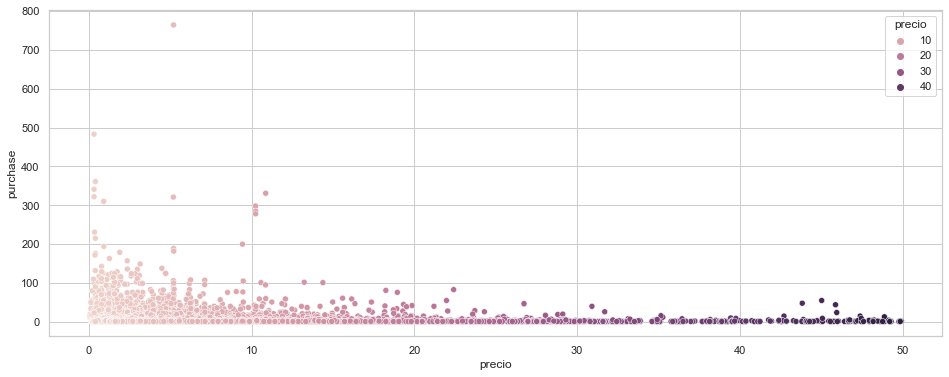

In [184]:
plt.subplots(figsize=(16,6))
sns.scatterplot(data = prod[(prod.purchase > 0) & (prod.precio < 50)], x = 'precio', y = 'purchase', hue = 'precio');

### ¿Hay productos de los que los clientes se arrepienten y eliminan más del carrito?

In [185]:
prod.insert(loc = 4,
            column = 'remove_from_cart_porc',
            value = prod.remove_from_cart / prod.cart *100 )
prod

,producto,view,cart,remove_from_cart,remove_from_cart_porc,purchase,precio
0,3752,10,0,0,NaN,0,15.71
1,3762,258,127,59,46.46,28,19.29
2,3763,51,10,2,20.00,2,16.00
3,3771,9,0,0,NaN,0,15.08
4,3774,76,26,13,50.00,7,15.92
...,...,...,...,...,...,...,...
45322,5932537,1,1,0,0.00,0,1.43
45323,5932538,1,0,0,NaN,0,1.43
45324,5932540,2,1,0,0.00,0,1.43
45325,5932578,1,0,0,NaN,0,6.02


In [91]:
prod.loc[prod.cart > 30].sort_values('remove_from_cart_porc', ascending = False)[0:30]

,producto,view,cart,remove_from_cart,remove_from_cart_porc,purchase,precio
14330,5797131,26.00,38.00,136.00,357.89,7.00,4.43
37937,5893670,36.00,35.00,109.00,311.43,3.00,4.90
29128,5858481,41.00,31.00,64.00,206.45,7.00,4.55
16658,5809346,8.00,34.00,62.00,182.35,7.00,0.78
26120,5848412,34.00,37.00,66.00,178.38,12.00,0.79
37944,5893677,64.00,41.00,70.00,170.73,10.00,4.69
8416,5731470,39.00,34.00,58.00,170.59,10.00,6.32
3217,5635096,32.00,32.00,52.00,162.50,11.00,4.42
3244,5635127,41.00,32.00,52.00,162.50,10.00,4.43
21617,5830537,35.00,37.00,60.00,162.16,8.00,1.73


Habría que ver por qué estos productos se eliminan más veces de las que se añaden:

* Si el motivo tiene sentido: revisar qué pasa con estos productos (otros productos alternativos, etc.).
* Si no lo tiene eliminar estos registros y analizar únicamente los que tienen `remove_from_cart_porc` menor o igual a 100.	

### ¿Cuales son los productos más vistos?

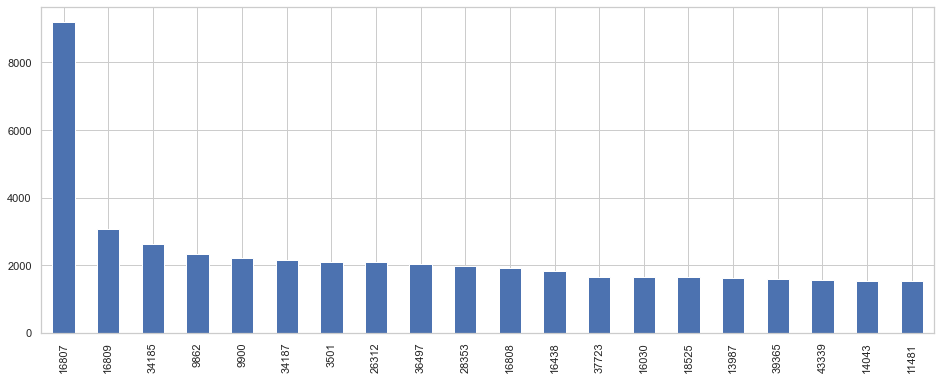

In [186]:
plt.subplots(figsize=(16,6))
prod.view.sort_values(ascending = False)[0:20].plot.bar();

Posiblemente lograríamos incrementar las ventas y el ticket medio simplemente destacando estos productos en la tienda.

Siempre que además de ser vistos también se vendan.

### ¿Hay productos deseados pero no comprados?

Por ejemplo productos que miran muchos clientes pero que luego no los compran.

Si los encontráramos habría que revisar qué pasa con ellos.

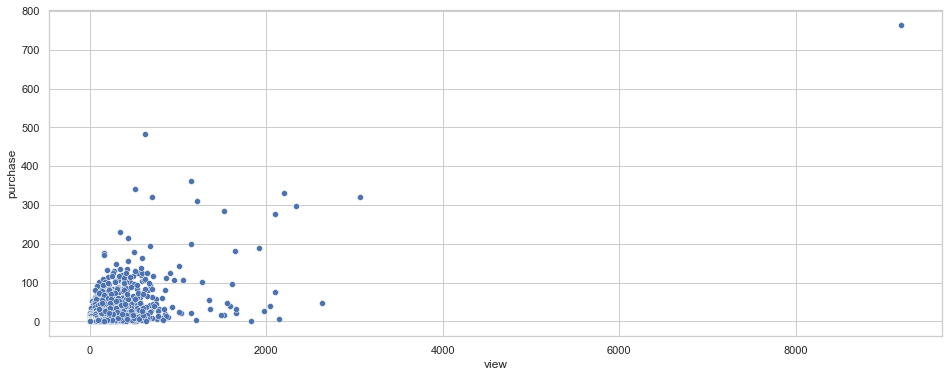

In [187]:
plt.subplots(figsize=(16,6))
sns.scatterplot(data = prod, x = 'view', y = 'purchase');

Eliminando atípico y haciendo zoom en la ventana de muchas vistas pocas compras.

(0.0, 150.0)

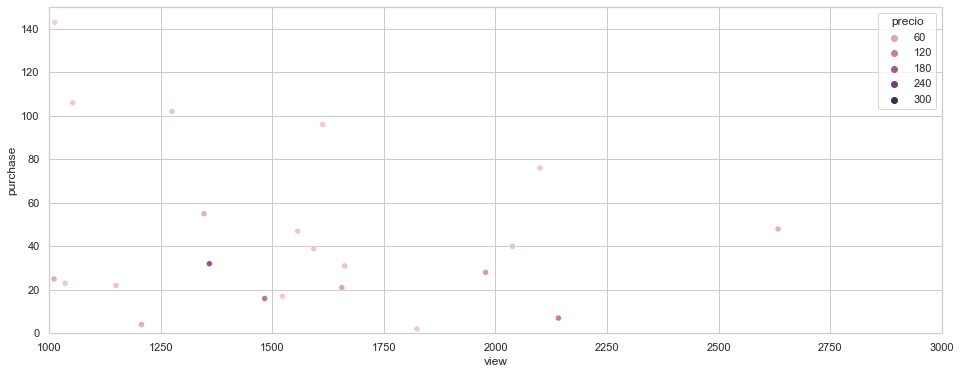

In [189]:
plt.subplots(figsize=(16,6))
sns.scatterplot(data = prod.loc[prod.view < 4000], x = 'view', y = 'purchase', hue = 'precio')
plt.xlim(1000,3000)
plt.ylim(0,150)

Hay una oportunidad con estos productos, porque por algún motivo generan el interés de los clientes, pero finalmente no los compran.

Habría que hacer un análisis sobre ellos.

### Construyendo un sistema de recomendación

Uno de los activos que más pueden incrementar las ventas de un ecommerce es un sistema de recomendación.

Ya podría aplicarse uno básico con los análisis de más visto y más vendido realizados anteriormente.

Pero la verdadera potencia viene cuando se crea un recomendador que personaliza para cada compra.

Tipos de sistemas de recomendación:

* Filtrado colaborativo:
    * Basados en items.
    * Basados en usuario.
* De contenido.

En nuestro caso vamos se desarrollará uno con filtrado colaborativo basado en items.

Metodología:

1. Crear el dataframe con el kpi de interés
2. Reducir la dimensión (opcional)
3. Seleccionar una métrica de distancia
4. Calcular la matriz item-item
5. Crear la lógica de priorización

#### Crear el dataframe con el kpi de interés

En este caso se empleará lo que se conoce como un kpi implícito, que será el número de veces que los productos han sido comprados por el mismo usuario.

Kpis explícitos serían, por ejemplo, estrellas o puntuaciones del 1 al 10.

Dado que este es una algoritmo que tarda en calcularse se reducirá el problema y se calculará solo para los 100 productos más vendidos.

Se desarrollará el proceso manualmente, no obstante, existen paquete ya preconstruídos más optimizados en cuanto a rendimiento.

Primero se calculará un maestro con los 100 productos más vendidos.

In [95]:
mas_vendidos = prod.sort_values('purchase', ascending = False).producto[0:100]
mas_vendidos

16807    5809910
28178    5854897
6644     5700037
314         5304
9900     5751422
          ...   
30395    5862564
9778     5749720
9732     5749149
22751    5835859
22116    5833335
Name: producto, Length: 100, dtype: int64

Creación de dataframe temporal filtrando por estos productos.

In [96]:
temp = df.loc[df.producto.isin(mas_vendidos)]
temp

,usuario,sesion,categoria,evento,producto,precio,date,año,mes,dia,hora,minuto,segundo,festivo,black_friday,san_valentin
fecha,,,,,,,,,,,,,,,,
2019-10-01 00:26:49,536128518,a31f0991-645e-4472-a012-95eb2f814568,1487580006317032337,purchase,5815662,0.92,2019-10-01,2019,10,1,0,26,49,0,0,0
2019-10-01 00:46:20,555415545,b9cc1771-9062-4e08-a3ad-363314cd17d8,1602943681873052386,view,5809912,5.24,2019-10-01,2019,10,1,0,46,20,0,0,0
2019-10-01 00:48:13,555415545,b9cc1771-9062-4e08-a3ad-363314cd17d8,1602943681873052386,view,5816170,5.24,2019-10-01,2019,10,1,0,48,13,0,0,0
2019-10-01 00:52:39,555415545,b9cc1771-9062-4e08-a3ad-363314cd17d8,1487580005092295511,view,5815730,10.95,2019-10-01,2019,10,1,0,52,39,0,0,0
2019-10-01 01:33:26,555456891,b3239dc3-f107-4034-a507-4c41f646e38a,1487580005092295511,view,5849033,10.32,2019-10-01,2019,10,1,1,33,26,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:11:44,615102046,17b94398-0397-4c59-bc84-fe91dde0a8ec,1487580006509970331,cart,5793703,2.22,2020-02-29,2020,2,29,23,11,44,0,0,0
2020-02-29 23:12:40,615102046,17b94398-0397-4c59-bc84-fe91dde0a8ec,2195085255034011676,cart,5550302,1.21,2020-02-29,2020,2,29,23,12,40,0,0,0
2020-02-29 23:12:50,599909613,1c6c708d-135d-487b-afa9-4bbcfd28db4d,1602943681873052386,cart,5809911,5.24,2020-02-29,2020,2,29,23,12,50,0,0,0


Creación de la matriz  usuario-item.

In [97]:
usuario_item = temp.loc[temp.evento == 'purchase'].groupby(['usuario','producto']).size().unstack(level = 1).fillna(0)
usuario_item

producto,4497,4600,4768,4938,4958,5013,5304,5526,5528034,5528035,...,5848909,5849033,5854812,5854897,5855332,5857007,5857360,5862564,5862943,5889300
usuario,,,,,,,,,,,,,,,,,,,,,
25392526,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50748978,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
74332980,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
80577370,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
88211255,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621646584,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
621788730,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
621925941,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Reducir la dimensión (opcional)

La matriz resultado es una matriz sparse.

Posiblemente sería conveniente reducir la dimensión con técnicas como SVD.

Por ahora continuamos sin hacer la reducción.

#### Seleccionar una métrica de distancia

Métricas más comunes:

* Distancia euclídea
* Correlación
* Coseno

En este caso vamos se ha seleccionado la distancia euclídea.

Se operativiza mediante la función spatial.distance.euclidean del paquete Scipy.

In [98]:
from scipy import spatial

#### Calcular la matriz item-item

Creación del recomendador que toma como input una matriz usuario-item y devuelve una matriz item-item con la distancia euclídea como dato.

In [99]:
def recomendador(dataframe):

    def distancia(producto):
        return(dataframe.apply(lambda x: spatial.distance.euclidean(x,producto)))

    return(dataframe.apply(lambda x: distancia(x)))

In [100]:
item_item = recomendador(usuario_item)
item_item

producto,4497,4600,4768,4938,4958,5013,5304,5526,5528034,5528035,...,5848909,5849033,5854812,5854897,5855332,5857007,5857360,5862564,5862943,5889300
producto,,,,,,,,,,,,,,,,,,,,,
4497,0.00,14.42,14.49,15.62,15.91,17.58,23.39,15.23,16.16,20.30,...,15.72,24.45,14.97,26.10,15.30,15.07,15.78,15.17,16.40,15.33
4600,14.42,0.00,10.68,14.49,14.59,16.46,22.69,13.93,14.87,19.70,...,14.39,23.87,13.49,25.75,13.78,13.60,14.46,13.86,14.73,13.89
4768,14.49,10.68,0.00,14.56,14.73,16.28,22.74,14.00,14.93,19.75,...,14.18,24.00,13.27,25.63,13.86,13.75,14.39,13.86,14.80,14.11
4938,15.62,14.49,14.56,0.00,15.52,16.03,22.96,14.76,15.65,20.25,...,15.13,24.17,14.35,25.87,14.76,14.59,15.46,14.97,15.72,15.13
4958,15.91,14.59,14.73,15.52,0.00,17.49,22.27,15.33,15.81,20.32,...,15.49,24.35,14.66,26.15,14.87,14.97,15.94,15.26,16.12,15.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857007,15.07,13.60,13.75,14.59,14.97,16.79,22.80,14.59,15.10,19.62,...,14.49,23.98,13.89,25.61,14.32,0.00,14.83,14.46,15.17,14.42
5857360,15.78,14.46,14.39,15.46,15.94,16.06,23.24,15.39,16.12,20.32,...,15.43,23.85,14.73,25.46,15.20,14.83,0.00,13.75,16.19,15.43
5862564,15.17,13.86,13.86,14.97,15.26,15.72,22.91,14.70,15.39,19.90,...,15.00,23.32,14.00,25.12,14.35,14.46,13.75,0.00,15.39,14.66


#### Crear la lógica de priorización

Ya está desarrollado el recomendador.

Debería llamarse a esta tabla cada vez que un usuario mire un producto o lo meta en el carrito.

Para ser más efectivos podría usarse toda la información acumulada de la sesión o incluso de todo el usuario si está logado.

Eso significa que se necesitam un sistema para recomendar productos tanto si el input es de un solo producto como de varios.

Y que a la vez devuelva varias recomendaciones, para cubrir todos los "huecos" de recomendación que la web del cliente pudiera tener.

Se implementará un algoritmo muy sencillo que hará:

1. Crear un array con los productos de entrada para extraer sus vectores de la matriz item-item.
2. Calcular la suma de distancias de todos los productos.
3. Quitarse a ellos mismos para no autorecomendarse.
4. Devolver los 10 con menor distancia.

In [101]:
#En el caso de varios productos vendrá del servidor web como una cadena separada con punto y coma
def priorizador(productos,devuelve = 10):
    #crear array con productos de entrada
    array = np.int64(productos.split(';'))
    
    #extraer sus vectores de la matriz total
    matriz = item_item[array]
    
    #calcular la suma de distancias
    suma_distancias = matriz.agg(sum,axis = 1)
    
    #eliminar los productos input
    suma_distancias = suma_distancias.loc[~suma_distancias.index.isin(list(array))]
    
    #Devolver los 10 con menor distancia
    return(suma_distancias.sort_values()[0:devuelve])

Comprobación un producto:

In [102]:
priorizador('4497')

producto
5724230             14.39
4600                14.42
5550302             14.49
4768                14.49
5749149             14.56
5833318             14.63
5824810             14.70
5835859             14.70
5809303             14.73
5833335             14.73
dtype: float64

Comprobación varios productos:

In [103]:
priorizador('4497;4600;4768')

producto
5749149             40.25
5833318             40.47
5833335             40.81
5809303             40.81
5724230             41.00
5824810             41.08
5835859             41.23
5550302             41.47
5816169             41.51
5844894             41.55
dtype: float64

# CONCLUSIONES

La tendencia actual es plana en todas las métricas, lo que confirma la necesidad de las acciones de CRO.

Tras el análisis realizado sobre los datos transaccionales se ha desarrollado un plan CRO de 12 iniciativas concretas organizadas en 5 grandes palancas de negocio que con alta probabilidad van a incrementar los baselines consiguiendo un incremento global de los ingresos del ecommerce.

## Baseline

En cada sesión, de media:

* KPIs por sesión: Se ven 2.2 productos
* KPIs por sesión: Se añaden 1.3 productos al carrito
* KPIs por sesión: Se eliminan 0.9 productos del carrito
* KPIs por sesión: Se compran 0.3 productos
* Venta cruzada: mediana de 5 productos por compra
* Recurrencia: el 10% de los clientes vuelve a comprar tras el primer mes
* Conversión: 60% de añadir al carrito sobre visualizaciones
* Conversión: 22% de compra sobre añadidos a carrito
* Conversión: 13% de compra sobre visualizaciones
* Facturación media mensual: 125.000€

## Acciones de incremento de visualizaciones

1. Revisar las campañas de paid (generación y retargeting) para concentrar la inversión en franjas entre las 9 y las 13 y entre las 18 y las 20
2. Concentrar la inversión del período navideño y post-navideño en la semana del black friday
3. Incrementar la inversión hasta llegar al CPA máximo en base al LTV que hemos identificado

## Acciones de incremento de conversión

4. Preconfigurar la home con los productos identificados en los análisis most viewed y most sold.
5. Trabajar sobre los productos con alta tasa de abandono de carrito
6. Trabajar sobre los productos muy vistos pero poco comprados y sobre los productos muy comprados pero poco vistos.

## Acciones de incremento de venta cruzada

7. La compra mediana incluye 5 productos
8. Incrementar este ratio mediante la recomendación en tiempo real con el nuevo recomendador

## Acciones de incremento de frecuencia de compra

9. El 90% de los clientes sólo hace una compra
10. Crear una newsletter periódica con el nuevo recomendador para incrementar la frecuencia de visita
11. Campañas promocionales sobre los segmentos top de la segmentación RFM

## Acciones de fidelización de clientes

12. Crear un programa de fidelización segmentado por la nueva segmentación RFM